In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm 
from __future__ import print_function
from patsy import dmatrices


from statsmodels.formula.api import ols

In [2]:
White = pd.read_csv("White Wine.csv")
White

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


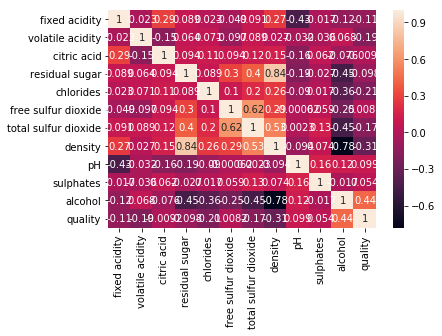

In [3]:
sns.heatmap(White.corr(), annot=True)

In [4]:
quality = White[['quality']]

In [6]:
fa = White[['fixed acidity']]
va = White[['volatile acidity']]
ca = White[['citric acid']]
chl = White[['chlorides']]
rs = White[['residual sugar']]
fsd = White[['free sulfur dioxide']]
tsd= White[['total sulfur dioxide']]
dt = White[['density']]
ph = White[['pH']]
sp = White[['sulphates']]
al = White[['alcohol']]

In [7]:
from statsmodels.formula.api import ols
model1 = ols('quality ~ fa + va+ ca +chl+ rs +fsd+ tsd+ dt+ ph +sp+al', data=White).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:12:40   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    150.1928     18.804      7.987      0.0

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[3067855.565999568,
 2.6914353162414906,
 1.1411561788373248,
 1.16521502639867,
 1.2368218629792984,
 12.644063540716639,
 1.7878802638105271,
 2.239233089356651,
 28.232546290998517,
 2.196361841026411,
 1.1385404254272604,
 7.706956513505269]

In [9]:
from statsmodels.formula.api import ols
model1 = ols('quality ~ fa + va+ ca +chl+ rs +fsd+ tsd+ ph +sp+al', data=White).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.3
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:17:06   Log-Likelihood:                -5574.7
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0636      0.348      5.926      0.0

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[1039.1298033945543,
 1.3561280336832522,
 1.1282984157196296,
 1.1598838169722814,
 1.2036453585304454,
 1.435214987716072,
 1.744627382558996,
 2.153170381271623,
 1.3309115916058152,
 1.056637416650311,
 1.6471174462531981]

In [12]:
from statsmodels.formula.api import ols
model1 = ols('quality ~ fa + va + rs +fsd+ tsd+ ph +sp+al', data=White).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     228.6
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:19:32   Log-Likelihood:                -5576.3
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4889   BIC:                         1.123e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9039      0.337      5.648      0.0

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[973.3525672339399,
 1.274207264231878,
 1.0854626664260676,
 1.4089095770496933,
 1.7433189049228963,
 2.141243979910274,
 1.3173871662682555,
 1.0524334395766066,
 1.4569576290409973]

In [14]:
from statsmodels.formula.api import ols
model1 = ols('quality ~ fa + va + rs +fsd+ ph +sp+al', data=White).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     260.2
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:21:32   Log-Likelihood:                -5579.3
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4890   BIC:                         1.123e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8921      0.337      5.611      0.0

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[973.1531897797165,
 1.242182089631488,
 1.0306664576297502,
 1.3759446834928615,
 1.1475810937100563,
 1.2951969860227803,
 1.033552505554698,
 1.3033576391113257]

In [16]:
data1 = pd.read_csv("White Wine.csv")
data1.columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','ph','sulphates','alcohol','quality']

In [17]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [18]:
model = forward_selected(data1, 'quality')
print(model.model.formula)
print(model.rsquared_adj)

quality ~ alcohol + volatile_acidity + residual_sugar + free_sulfur_dioxide + density + ph + sulphates + fixed_acidity + 1
0.28057667546860576


In [19]:
ConcreteX = data1[data1.columns.difference(['quality'])]
print(ConcreteX)

        alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      8.800000      0.045         0.36  1.00100            7.0   
1      9.500000      0.049         0.34  0.99400            6.3   
2     10.100000      0.050         0.40  0.99510            8.1   
3      9.900000      0.058         0.32  0.99560            7.2   
4      9.900000      0.058         0.32  0.99560            7.2   
5     10.100000      0.050         0.40  0.99510            8.1   
6      9.600000      0.045         0.16  0.99490            6.2   
7      8.800000      0.045         0.36  1.00100            7.0   
8      9.500000      0.049         0.34  0.99400            6.3   
9     11.000000      0.044         0.43  0.99380            8.1   
10    12.000000      0.033         0.41  0.99080            8.1   
11     9.700000      0.035         0.40  0.99470            8.6   
12    10.800000      0.040         0.37  0.99200            7.9   
13    12.400000      0.044         0.40  0.99120            6.

In [21]:
X=ConcreteX
y = data1.quality

In [22]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  alcohol                        with p-value 5.61477e-226
Add  volatile_acidity               with p-value 1.77332e-70
Add  residual_sugar                 with p-value 9.11385e-28
Add  free_sulfur_dioxide            with p-value 1.76808e-09
Add  density                        with p-value 8.94502e-09
Add  ph                             with p-value 9.80885e-11
Add  sulphates                      with p-value 7.4207e-09
Add  fixed_acidity                  with p-value 0.000864388
resulting features:


In [24]:
from statsmodels.formula.api import ols
mod= ols('quality ~ al+va+rs+fsd+dt+ph+fa', data=White).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     266.2
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:46:37   Log-Likelihood:                -5563.9
No. Observations:                4898   AIC:                         1.114e+04
Df Residuals:                    4890   BIC:                         1.120e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.9297     17.382      6.957      0.0

# Day 3

In [25]:
trainWhite=data1.sample(frac=0.7,random_state=200)
testWhite=data1.drop(trainWhite.index)

In [26]:
trainWhiteX = trainWhite[trainWhite.columns.difference(['quality'])]
X=trainWhiteX
y = trainWhite.quality

In [27]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  alcohol                        with p-value 1.10662e-166
Add  volatile_acidity               with p-value 5.01629e-50
Add  residual_sugar                 with p-value 4.61519e-20
Add  free_sulfur_dioxide            with p-value 5.11722e-11
Add  density                        with p-value 0.000148938
Add  ph                             with p-value 7.59358e-07
Add  sulphates                      with p-value 9.02138e-06
Add  fixed_acidity                  with p-value 0.0079836
resulting features:


In [28]:
columns1 = [ 'alcohol', 'volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density','ph','sulphates','fixed_acidity']
testWhiteX1 = pd.DataFrame(testWhite, columns=columns1)  
modeltrain1 = ols('quality ~  alcohol + volatile_acidity + sulphates + residual_sugar + density + ph + free_sulfur_dioxide+ fixed_acidity', data=trainWhite).fit()
modeltrain1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          2.59e-247
Time:                        15:30:12   Log-Likelihood:                -3839.7
No. Observations:                3429   AIC:                             7697.
Df Residuals:                    3420   BIC:                             7753.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             125.9818     20.089      6.271      0.000      86.593     165.370
alcohol                 0.2353      0.027      8.836      0.000       0.183       0.288
volatile_acidity       -1.8516      0.130    -14.243      0.000      -2.107      -1.597
sulphates               0.5686      0.119      4.779      0.000       0.335       0.802
residual_sugar          0.0716      0.008      8.615      0.000       0.055       0.088
density              -126.1602     20.369     -6.194      0.000    -166.097     -86.224
ph                      0.6328      0.121      5.209      0.000       0.395       0.871
free_sulfur_dioxide     0.0049      0.001      5.792      0.000       0.003       0.007
fixed_acidity           0.0622      0.023      2.654      0.008       0.016       0.108
==============================================================================
Omnibus:                       70.892   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.435
Skew:                           0.169   Prob(JB):                     4.27e-27
Kurtosis:                       3.857   Cond. No.                     9.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
testpred1 =  modeltrain1.predict(testWhiteX1) # predict out of sample
np.mean(np.square(testWhite.quality - testpred1))

0.5983227338615276